# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path
import math

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,a203,0,45.000000,0,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN
1,a203,5,48.508468,0,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN
2,a203,10,51.852437,1,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN
3,a203,15,52.777870,1,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN
4,a203,20,55.173336,1,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking the number of mice.
# Found unique "Mouse ID" and calculate the num of mice within the data set
mice_num = len(merged_data['Mouse ID'])
print(f"Number of mice in merged data: {mice_num}")

mice_num_unique = len(merged_data['Mouse ID'].unique())
print(f"Number of mice in merged data for unique mouse ID: {mice_num_unique}")

Number of mice in merged data: 1893
Number of mice in merged data for unique mouse ID: 249


In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
merged_data['unique_mouse_id'] = merged_data['Mouse ID'] + merged_data['Timepoint'].astype(str)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# test = merged_data.duplicated(subset=['unique_mouse_id'])
unique_val =  merged_data[merged_data.duplicated(subset=['unique_mouse_id'],keep=False)]
print(unique_val['Mouse ID'])

586    g989
587    g989
588    g989
589    g989
590    g989
591    g989
592    g989
593    g989
594    g989
595    g989
Name: Mouse ID, dtype: object


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
unique_val =  merged_data[merged_data.duplicated(subset=['unique_mouse_id'],keep=False)]
unique_val.head(n=100)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,unique_mouse_id
586,g989,0,45.000000,0,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g9890
587,g989,0,45.000000,0,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g9890
588,g989,5,48.786801,0,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g9895
589,g989,5,47.570392,0,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g9895
590,g989,10,51.745156,0,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g98910
591,g989,10,49.880528,0,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g98910
592,g989,15,51.325852,1,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g98915
593,g989,15,53.442020,0,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g98915
594,g989,20,55.326122,1,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g98920
595,g989,20,54.657650,1,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,g98920


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newDataSet = merged_data.drop_duplicates(subset=['unique_mouse_id'])
newDataSet.head()                                                                                                           

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,unique_mouse_id
0,a203,0,45.000000,0,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN,a2030
1,a203,5,48.508468,0,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN,a2035
2,a203,10,51.852437,1,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN,a20310
3,a203,15,52.777870,1,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN,a20315
4,a203,20,55.173336,1,Infubinol,Female,20,23,NaN,NaN,NaN,NaN,NaN,a20320


In [13]:
# Checking the number of mice in the clean DataFrame.
# Found unique "Mouse ID" and calculate the num of mice within the data set
mice_num1 = len(newDataSet['Mouse ID'].unique())
print(f"Number of mice in merged data: {mice_num1}")

# Even though I got rid of the duplicates the lenght in the data for Mouse ID is still going to be the same. I do not know where the 248 comes from 

Number of mice in merged data: 249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## Mean
mean_newDataSet = newDataSet.groupby('Drug Regimen').mean()

## Median
median_newDataSet = newDataSet.groupby('Drug Regimen').median()

## Variance 
variance_newDataSet = newDataSet.groupby('Drug Regimen').var()

## Standard deviacion
std_newDataSet = newDataSet.groupby('Drug Regimen').std()

## SEM - Standard error = standard deviasion/sqrt(n)  
## Sqrt function
def squareRoot(x):
    return math.sqrt(x)

counts = newDataSet.groupby('Drug Regimen')['Drug Regimen'].count()
square_counts = counts.apply(squareRoot)
square_counts.head()
SEM_newDataSet = std_newDataSet.divide(square_counts,axis=0)
SEM_newDataSet.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Data = {'Mean Tumor Volume': mean_newDataSet['Tumor Volume (mm3)'], 'Median Tumor Valume':median_newDataSet['Tumor Volume (mm3)'], 'Tumor Volume Variance':variance_newDataSet['Tumor Volume (mm3)'], 'Tumor Volume Std. Dev':std_newDataSet['Tumor Volume (mm3)'], 'Tumor Volume Std. Err':SEM_newDataSet['Tumor Volume (mm3)']}

data_summary = pd.DataFrame(data=Data)

# Display the DataFrame
data_summary


C:\Users\jeny_\AppData\Local\Temp\ipykernel_16276\1518276389.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_newDataSet = newDataSet.groupby('Drug Regimen').mean()
C:\Users\jeny_\AppData\Local\Temp\ipykernel_16276\1518276389.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_newDataSet = newDataSet.groupby('Drug Regimen').median()
C:\Users\jeny_\AppData\Local\Temp\ipykernel_16276\1518276389.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns

,Mean Tumor Volume,Median Tumor Valume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

Data = {'mean': mean_newDataSet['Tumor Volume (mm3)'], 'median':median_newDataSet['Tumor Volume (mm3)'], 'var':variance_newDataSet['Tumor Volume (mm3)'], 'std':std_newDataSet['Tumor Volume (mm3)'], 'sem':SEM_newDataSet['Tumor Volume (mm3)']}
data_summary = pd.DataFrame(data=Data)

# Display the DataFrame
data_summary

# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

([<matplotlib.axis.XTick at 0x20ee9621840>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

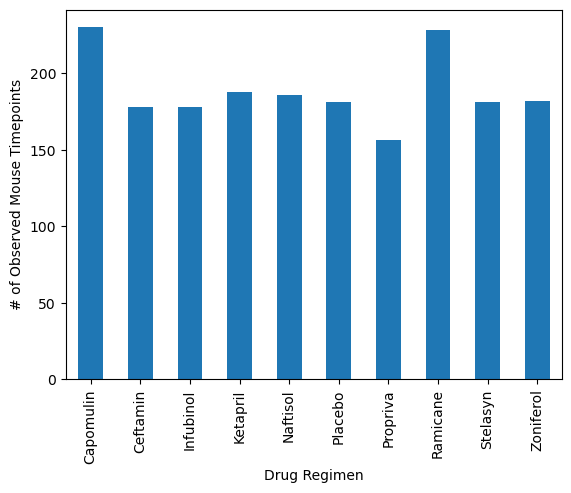

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

x_axis = np.arange(0,10)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

test = newDataSet.groupby('Drug Regimen')['Mouse ID'].count()

test_graph = test.plot.bar(legend = False)
test_graph
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(tick_locations,test.keys())


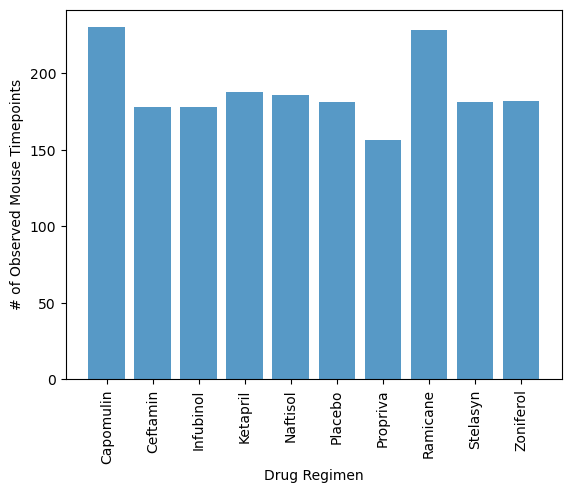

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(0,10)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plot = newDataSet.groupby('Drug Regimen')['Mouse ID'].count()
plt.bar(x_axis,plot,alpha=0.75,align="center")
plt.xlabel('Drug Regimen')
plt.xticks(tick_locations,test.keys(), rotation="vertical")
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()


<Axes: title={'center': 'Male vs Female Mouse Population'}, ylabel='Sex'>

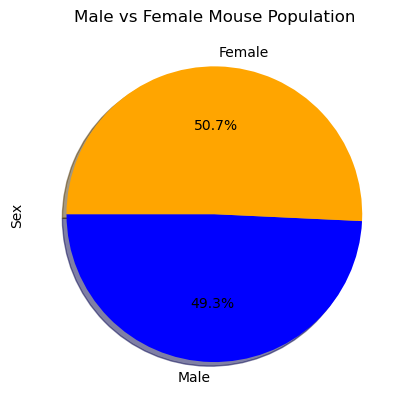

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
## Percentage function
def percentage(y):
    return (100*y)/len(newDataSet)

size = newDataSet.groupby('Sex')['Sex'].count()
size_percentage = size.apply(percentage)

labels = ["Male", "Female"]
colors = ["blue", "orange"]

pie_graph = size.plot.pie(labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel('Sex')
plt.title('Male vs Female Mouse Population')

pie_graph

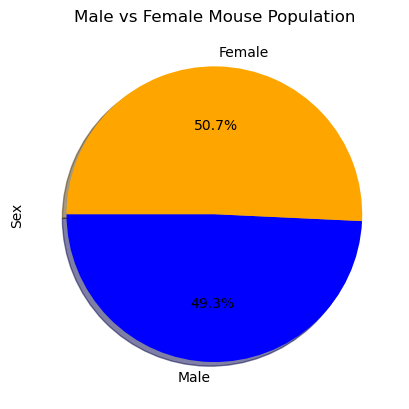

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
## Percentage function
def percentage(y):
    return (100*y)/len(newDataSet)

size = newDataSet.groupby('Sex')['Sex'].count()
size_percentage = size.apply(percentage)

labels = ["Male", "Female"]
colors = ["blue", "orange"]

plt.pie(size_percentage, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel('Sex')
plt.title('Male vs Female Mouse Population')
plt.show()

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin", :]
ram_data = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane", :]
inf_data = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol", :]
ceft_data = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin", :]
#cap_data.head()

# Start by getting the last (greatest) timepoint for each mouse
cap_max = cap_data.groupby('Mouse ID')['Tumor Volume (mm3)'].max()
ram_max = ram_data.groupby('Mouse ID')['Tumor Volume (mm3)'].max()
inf_max = inf_data.groupby('Mouse ID')['Tumor Volume (mm3)'].max()
ceft_max = ceft_data.groupby('Mouse ID')['Tumor Volume (mm3)'].max()

cap_vol = pd.DataFrame(cap_max)
cap_merged = pd.merge(cap_vol, merged_data)

ram_vol = pd.DataFrame(ram_max)
ram_merged = pd.merge(ram_vol, merged_data)

inf_vol = pd.DataFrame(inf_max)
inf_merged = pd.merge(inf_vol, merged_data)

ceft_vol = pd.DataFrame(ceft_max)
ceft_merged = pd.merge(ceft_vol, merged_data)

#  Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Data1 = {'Capomulin':cap_merged['Tumor Volume (mm3)'], 'Ramicane':ram_merged['Tumor Volume (mm3)'], 'Infubinol':inf_merged['Tumor Volume (mm3)'], 'Ceftamin':ceft_merged['Tumor Volume (mm3)']}
data_summary1 = pd.DataFrame(data=Data1)

# Display the DataFrame
data_summary1

,Capomulin,Ramicane,Infubinol,Ceftamin
0,45.651331,45.466677,67.973419,62.999356
1,45.000000,45.000000,65.525743,45.000000
2,45.000000,45.000000,57.031862,45.000000
3,45.000000,45.000000,66.083066,45.000000
4,45.000000,45.000000,72.226731,45.000000
...,...,...,...,...
2510,NaN,46.585433,NaN,NaN
2511,NaN,45.625802,NaN,NaN
2512,NaN,45.568211,NaN,NaN
2513,NaN,47.622816,NaN,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
cap_tumor = cap_merged["Tumor Volume (mm3)"]
cap_tumor.head()

quartile_val = cap_tumor.quantile([.25,.5,.75])
lowerq = quartile_val[0.25]
upperq = quartile_val[0.75]
iqr = upperq-lowerq
print(quartile_val)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


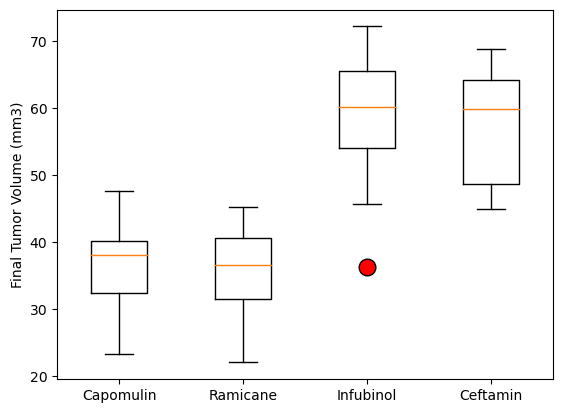

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

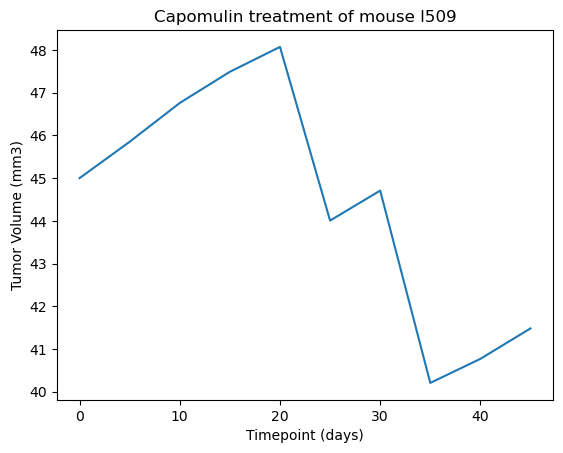

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


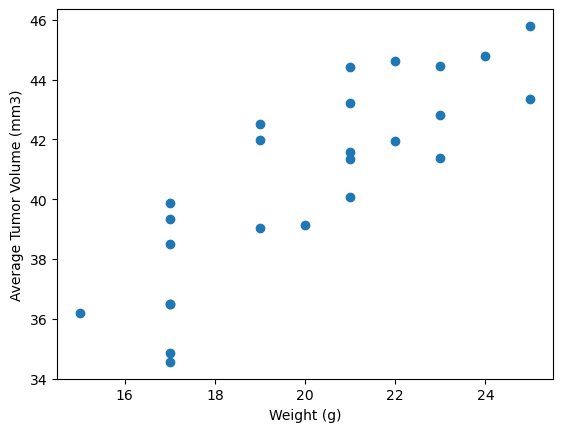

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


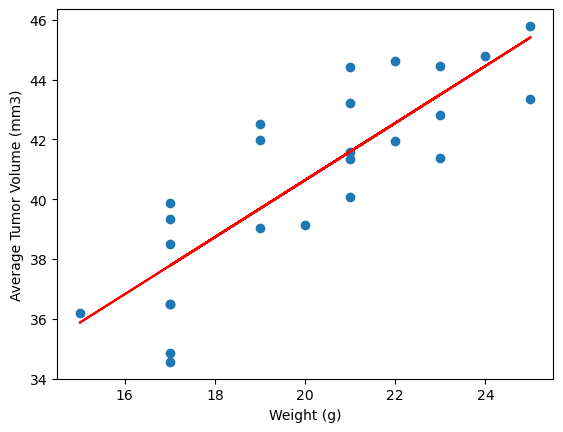

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
